In [1]:
import os
import os.path as osp
import sys

import cv2
import dlib
import numpy as np
import requests
import scipy.ndimage
from torchvision import transforms
from PIL import Image

In [2]:
path_mask= 'face_mask2'
for i,file in enumerate(os.listdir(path_mask)):
    print(i, file)

0 ookawa_angry2.png
1 ookawa_default.png
2 takebe_default.png
3 test01_03.png
4 woman_default.png
5 yotaka_angry2.png
6 yotaka_default.png
7 yotaka_smile.png


In [22]:
ind_mask = {6,7}  # インデント順に追加
on_reverse = False

masks = []
name_mask = []
for i, file in enumerate(os.listdir(path_mask)):
    if i in ind_mask:
        mask = cv2.imread(f'{path_mask}/{file}')
        name_mask.append(osp.splitext(file)[0])
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        masks.append(mask)
if on_reverse:
    masks.reverse()
    name_mask.reverse()

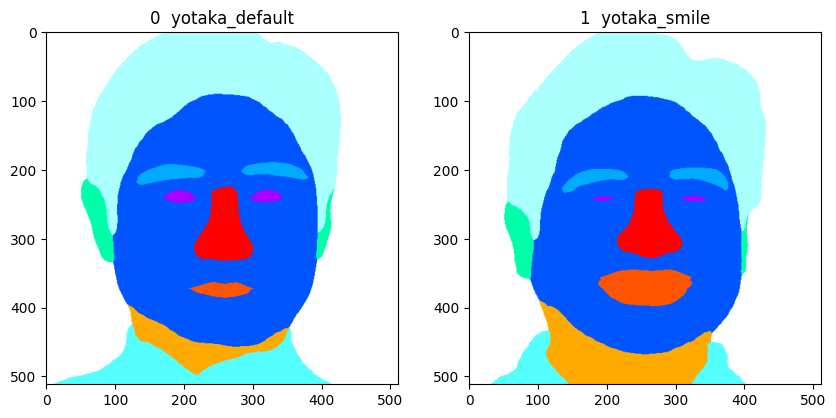

In [23]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
for i in range(num_mask):
    ax[i].set_title(f'{i}  {name_mask[i]}')
    ax[i].imshow(masks[i])

plt.show()

## pose

In [24]:
mask_pose = np.array([masks[0].copy(), masks[1].copy()])

for i in range(len(mask_pose)):
    for j in range(len(mask_pose[i,0])):
        for k in range(len(mask_pose[i,1])):
            if np.all(mask_pose[i,j,k] == [0, 170, 255]) or \
                      np.all(mask_pose[i,j,k] == [170, 0, 255]) or \
                      np.all(mask_pose[i,j,k] == [255, 0, 0]) or \
                      np.all(mask_pose[i,j,k] == [255, 85, 0]):
                          mask_pose[i,j,k] = [0, 85, 255]

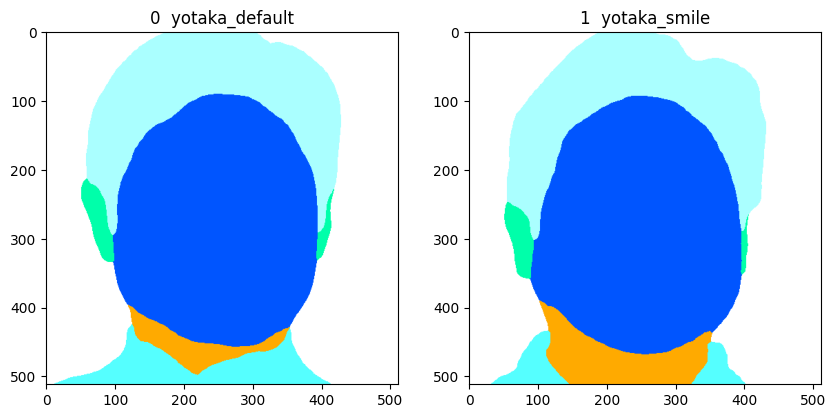

In [25]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
for i in range(num_mask):
    ax[i].set_title(f'{i}  {name_mask[i]}')
    ax[i].imshow(mask_pose[i])

plt.show()

## face

In [26]:
mask_face = mask_pose[0].copy()

for i in range(len(mask_face[0])):
    for j in range(len(mask_face[1])):
        if np.all(masks[1][i,j] == [0, 170, 255]):
            mask_face[i,j] = [0, 170, 255]
        if np.all(masks[1][i,j] == [170, 0, 255]):
            mask_face[i,j] = [170, 0, 255]
        if np.all(masks[1][i,j] == [255, 0, 0]):
            mask_face[i,j] = [255, 0, 0]
        if np.all(masks[1][i,j] == [255, 85, 0]):
            mask_face[i,j] = [255, 85, 0]

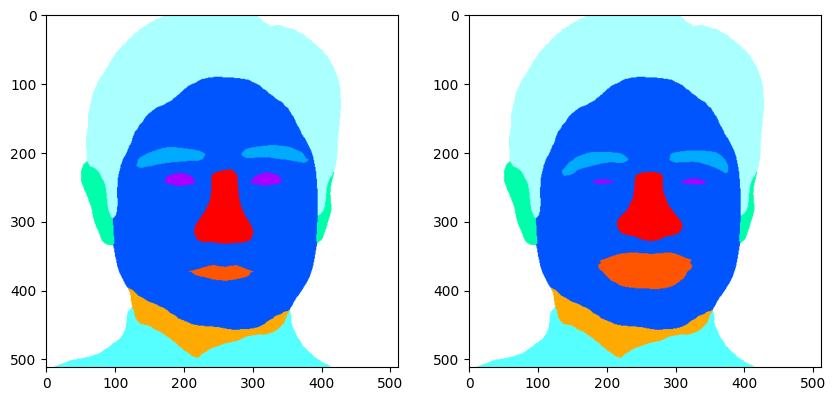

In [27]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
ax[0].imshow(masks[0])
ax[1].imshow(mask_face)

plt.show()

## eye

In [28]:
mask_eye = masks[0].copy()

for i in range(len(mask_eye[0])):
    for j in range(len(mask_eye[1])):
        if np.all(mask_eye[i,j] == [0, 170, 255]):
            mask_eye[i,j] = [0, 85, 255]
        if np.all(mask_eye[i,j] == [170, 0, 255]):
            mask_eye[i,j] = [0, 85, 255]
        
        if np.all(masks[1][i,j] == [0, 170, 255]):
            mask_eye[i,j] = [0, 170, 255]
        if np.all(masks[1][i,j] == [170, 0, 255]):
            mask_eye[i,j] = [170, 0, 255]

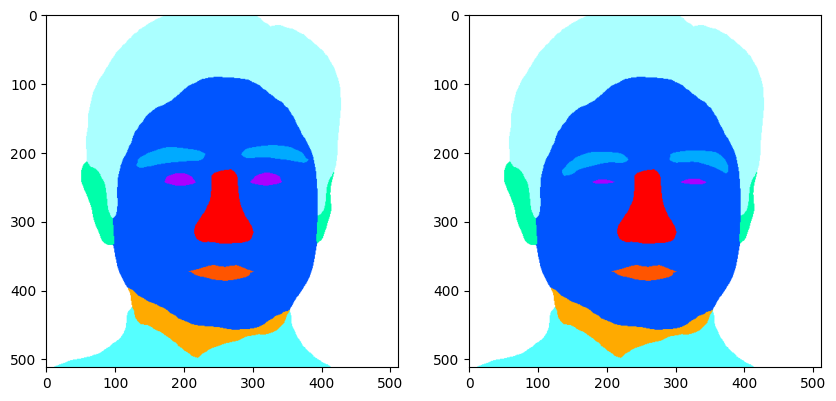

In [29]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
ax[0].imshow(masks[0])
ax[1].imshow(mask_eye)

plt.show()

## mouth

In [30]:
mask_mouth = masks[0].copy()

for i in range(len(mask_mouth[0])):
    for j in range(len(mask_mouth[1])):
        if np.all(mask_mouth[i,j] == [255, 85, 0]):
            mask_mouth[i,j] = [0, 85, 255]
        
        if np.all(masks[1][i,j] == [255, 85, 0]):
            mask_mouth[i,j] = [255, 85, 0]

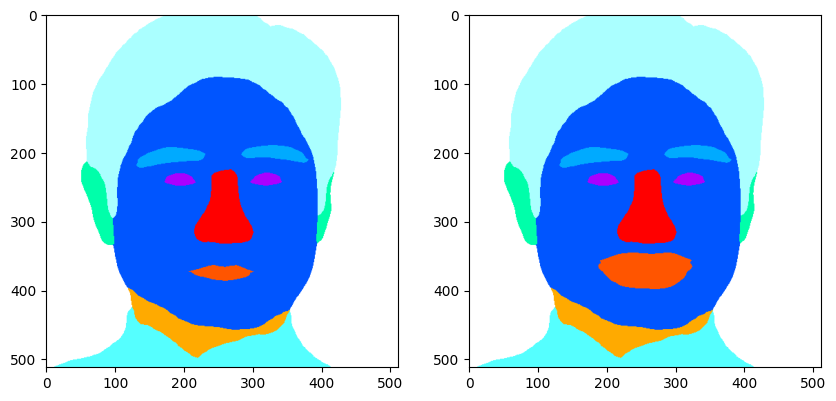

In [31]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
ax[0].imshow(masks[0])
ax[1].imshow(mask_mouth)

plt.show()

## eye&mouth

In [32]:
mask_eyemouth = mask_eye.copy()

for i in range(len(mask_eyemouth[0])):
    for j in range(len(mask_eyemouth[1])):
        if np.all(mask_eyemouth[i,j] == [255, 85, 0]):
            mask_eyemouth[i,j] = [0, 85, 255]
        
        if np.all(masks[1][i,j] == [255, 85, 0]):
            mask_eyemouth[i,j] = [255, 85, 0]

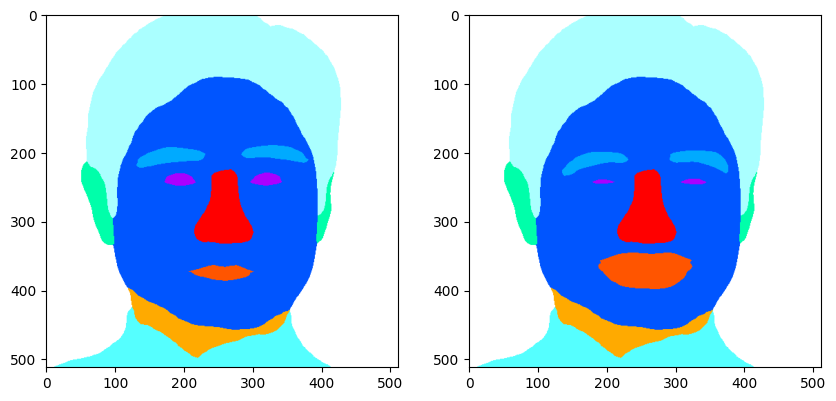

In [33]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
ax[0].imshow(masks[0])
ax[1].imshow(mask_eyemouth)

plt.show()

## mouth&nose

In [34]:
mask_mouthnose = mask_mouth.copy()

for i in range(len(mask_mouthnose[0])):
    for j in range(len(mask_mouthnose[1])):
        if np.all(mask_mouthnose[i,j] == [255, 0, 0]):
            mask_mouthnose[i,j] = [0, 85, 255]
        
        if np.all(masks[1][i,j] == [255, 0, 0]):
            mask_mouthnose[i,j] = [255, 0, 0]

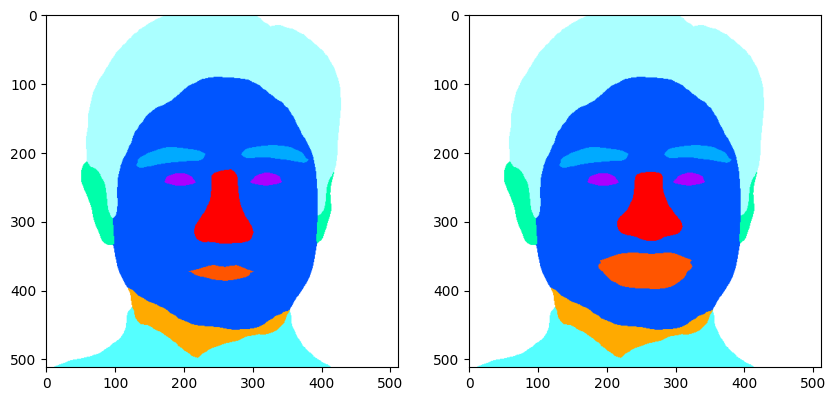

In [35]:
import matplotlib.pyplot as plt

num_mask = len(masks)
fig, ax = plt.subplots(1, num_mask, figsize=(5*num_mask, 5))
ax[0].imshow(masks[0])
ax[1].imshow(mask_mouthnose)

plt.show()

## 保存

In [36]:
dst_dir = f"mask_test/{name_mask[0]}-{name_mask[1]}"
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

In [37]:
cv2.imwrite(
    f"{dst_dir}/from.png",
    cv2.cvtColor(masks[0], cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/to.png",
    cv2.cvtColor(masks[1], cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/pose_from.png",
    cv2.cvtColor(mask_pose[0], cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/pose_to.png",
    cv2.cvtColor(mask_pose[1], cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/face_to.png",
    cv2.cvtColor(mask_face, cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/eye_to.png",
    cv2.cvtColor(mask_eye, cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/mouth_to.png",
    cv2.cvtColor(mask_mouth, cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/eyemouth_to.png",
    cv2.cvtColor(mask_eyemouth, cv2.COLOR_RGB2BGR),
)
cv2.imwrite(
    f"{dst_dir}/mouthnose_to.png",
    cv2.cvtColor(mask_mouthnose, cv2.COLOR_RGB2BGR),
)

True